# **PIZZA SALES ANALYSIS**


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [24]:
sales = pd.read_csv("C:/Users/shikh/Downloads/Data Model - Pizza Sales.xlsx - pizza_sales.csv")
sales.head

<bound method NDFrame.head of        order_details_id  order_id       pizza_id  quantity  order_date  \
0                     1         1     hawaiian_m         1    1/1/2015   
1                     2         2  classic_dlx_m         1    1/1/2015   
2                     3         2  five_cheese_l         1    1/1/2015   
3                     4         2    ital_supr_l         1    1/1/2015   
4                     5         2     mexicana_m         1    1/1/2015   
...                 ...       ...            ...       ...         ...   
48615             48616     21348  ckn_alfredo_m         1  12/31/2015   
48616             48617     21348  four_cheese_l         1  12/31/2015   
48617             48618     21348   napolitana_s         1  12/31/2015   
48618             48619     21349     mexicana_l         1  12/31/2015   
48619             48620     21350      bbq_ckn_s         1  12/31/2015   

      order_time  unit_price  total_price pizza_size pizza_category  \
0       11

In [25]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_details_id   48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_id           48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [26]:
sales.drop('order_details_id' , axis = 1, inplace = True)

In [27]:
sales.describe(include = 'all')

,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
count,48620.000000,48620,48620.000000,48620,48620,48620.000000,48620.000000,48620,48620,48620,48620
unique,NaN,91,NaN,358,16382,NaN,NaN,5,4,32,32
top,NaN,big_meat_s,NaN,11/26/2015,12:32:00,NaN,NaN,L,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
freq,NaN,1811,NaN,261,26,NaN,NaN,18526,14579,2416,2416
mean,10701.479761,NaN,1.019622,NaN,NaN,16.494132,16.821474,NaN,NaN,NaN,NaN
std,6180.119770,NaN,0.143077,NaN,NaN,3.621789,4.437398,NaN,NaN,NaN,NaN
min,1.000000,NaN,1.000000,NaN,NaN,9.750000,9.750000,NaN,NaN,NaN,NaN
25%,5337.000000,NaN,1.000000,NaN,NaN,12.750000,12.750000,NaN,NaN,NaN,NaN
50%,10682.500000,NaN,1.000000,NaN,NaN,16.500000,16.500000,NaN,NaN,NaN,NaN
75%,16100.000000,NaN,1.000000,NaN,NaN,20.250000,20.500000,NaN,NaN,NaN,NaN


In [28]:
sales['order_id'] = sales['quantity'].astype('int16')
sales['quantity'] = sales['quantity'].astype('int8')
sales['order_date'] = pd.to_datetime(sales['order_date'])
sales['unit_price'] = sales['unit_price'].astype('float32')
sales['total_price'] = sales['total_price'].astype('float32')

In [29]:
sales['order_datetime'] = pd.to_datetime(sales['order_date'].astype(str) + ' ' + sales['order_time'])


In [31]:
sales.set_index('order_datetime', inplace=True)

In [32]:
print("\nTotal Revenue:", sales['total_price'].sum())
print("\nTop 5 Most Ordered Pizzas:\n", sales['pizza_name'].value_counts().head())
print("\nTop Revenue-Generating Pizzas:\n", sales.groupby('pizza_name')['total_price'].sum().sort_values(ascending=False).head())



Total Revenue: 817860.06

Top 5 Most Ordered Pizzas:
 pizza_name
The Classic Deluxe Pizza      2416
The Barbecue Chicken Pizza    2372
The Hawaiian Pizza            2370
The Pepperoni Pizza           2369
The Thai Chicken Pizza        2315
Name: count, dtype: int64

Top Revenue-Generating Pizzas:
 pizza_name
The Thai Chicken Pizza          43434.25
The Barbecue Chicken Pizza      42768.00
The California Chicken Pizza    41409.50
The Classic Deluxe Pizza        38180.50
The Spicy Italian Pizza         34831.25
Name: total_price, dtype: float32


## **Orders by Pizza Category**

C:\Users\shikh\AppData\Local\Temp\ipykernel_33268\2207292007.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=sales, x='pizza_category', palette='Set2')


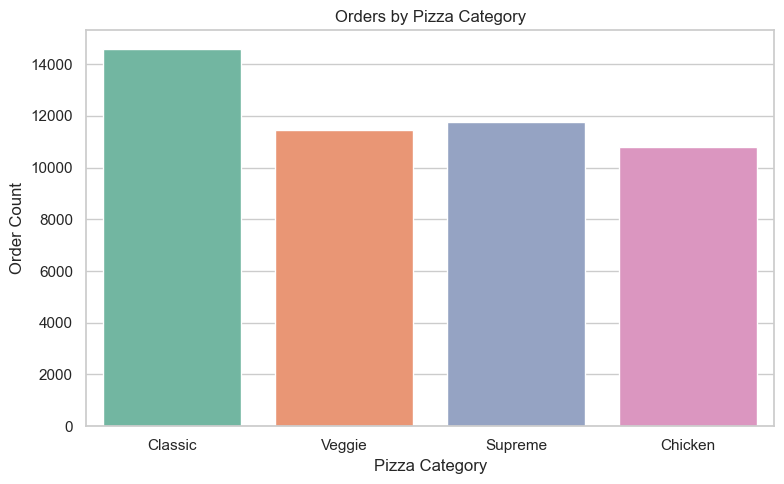

In [33]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.countplot(data=sales, x='pizza_category', palette='Set2')
plt.title('Orders by Pizza Category')
plt.ylabel('Order Count')
plt.xlabel('Pizza Category')
plt.tight_layout()
plt.show()

## **Orders by Pizza Size**

C:\Users\shikh\AppData\Local\Temp\ipykernel_33268\382672224.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=sales, x='pizza_size', palette='coolwarm')


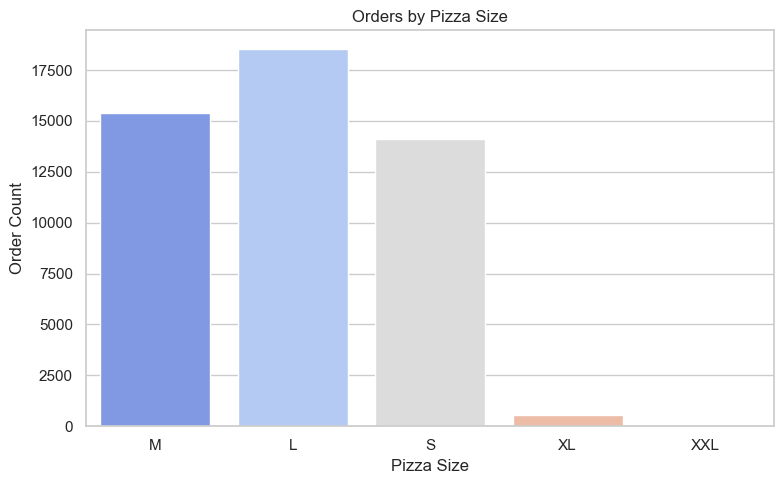

In [34]:
plt.figure(figsize=(8, 5))
sns.countplot(data=sales, x='pizza_size', palette='coolwarm')
plt.title('Orders by Pizza Size')
plt.ylabel('Order Count')
plt.xlabel('Pizza Size')
plt.tight_layout()
plt.show()

## **Top 10 Most Ordered Pizzas**

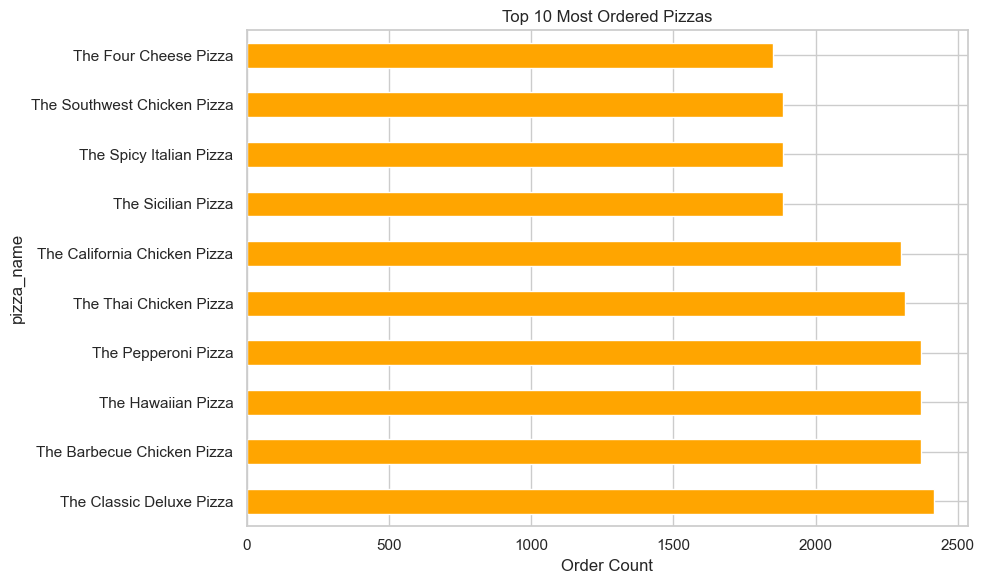

In [36]:
plt.figure(figsize=(10, 6))
sales['pizza_name'].value_counts().head(10).plot(kind='barh', color='orange')
plt.title('Top 10 Most Ordered Pizzas')
plt.xlabel('Order Count')
plt.tight_layout()
plt.show()

## ** Daily Order Volume**

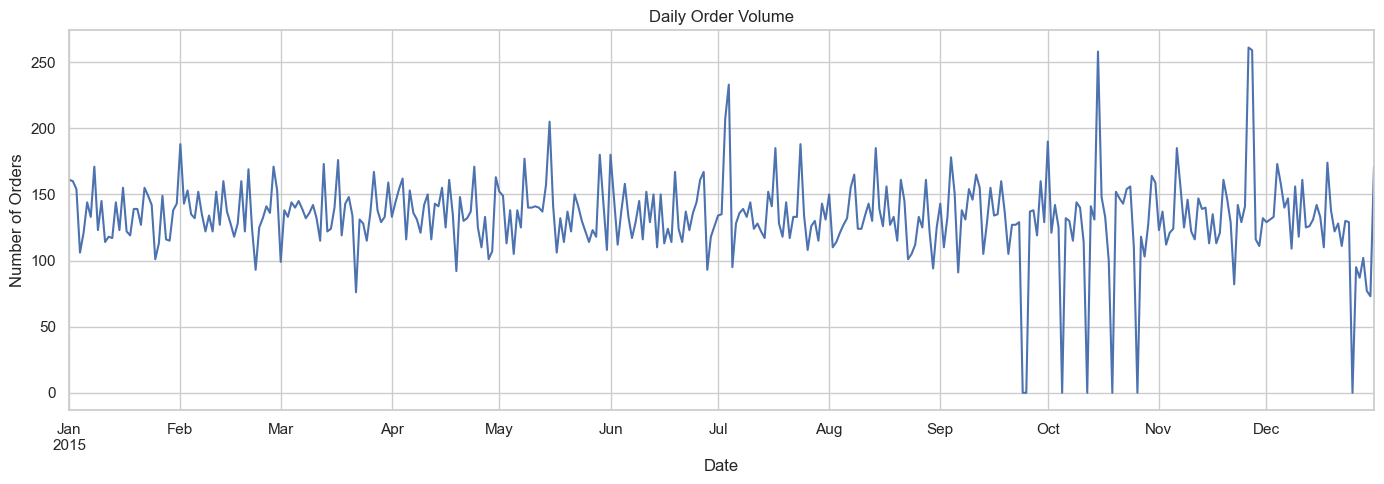

In [37]:
daily_orders = sales.resample('D').size()
plt.figure(figsize=(14, 5))
daily_orders.plot()
plt.title('Daily Order Volume')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

## **Revenue by Pizza Size**

C:\Users\shikh\AppData\Local\Temp\ipykernel_33268\3741857998.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sales, x='pizza_size', y='total_price', palette='pastel')


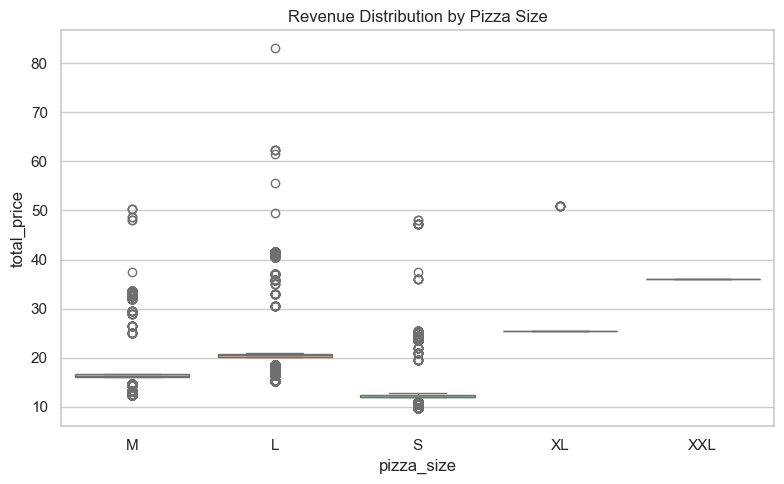

In [38]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=sales, x='pizza_size', y='total_price', palette='pastel')
plt.title('Revenue Distribution by Pizza Size')
plt.tight_layout()
plt.show()

## **Revenue by Pizza Category**

C:\Users\shikh\AppData\Local\Temp\ipykernel_33268\1030949322.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sales, x='pizza_category', y='total_price', palette='muted')


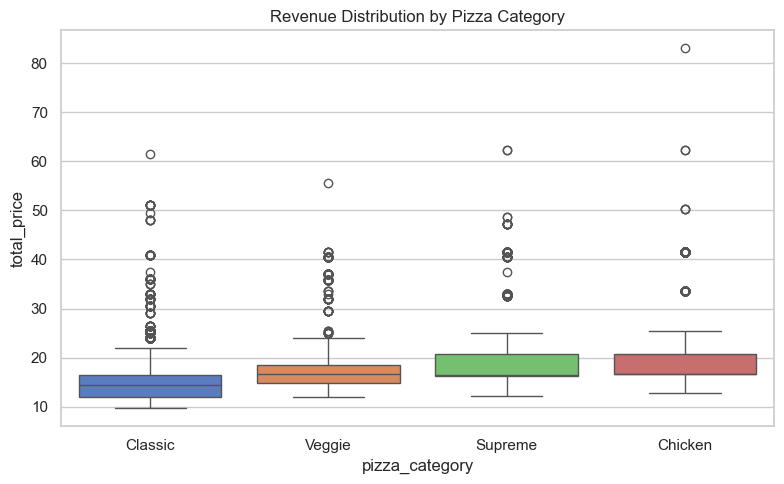

In [39]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=sales, x='pizza_category', y='total_price', palette='muted')
plt.title('Revenue Distribution by Pizza Category')
plt.tight_layout()
plt.show()